In [1]:
!pip install autokeras

In [2]:
import os
import shutil

import numpy as np
import tensorflow as tf

import autokeras as ak

# from tensorflow.keras.preprocessing import image_dataset_from_directory

2022-12-20 21:52:39.339427: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
image_size = (250, 250)
batch_size = 32
# epochs = 100

In [4]:
train_ds = ak.image_dataset_from_directory(
    '../dat/train/', 
    seed=4231,
    image_size=image_size, 
    shuffle=True,
    batch_size=batch_size,
    #crop_to_aspect_ratio=True
)


val_ds = ak.image_dataset_from_directory(
    '../dat/val/', 
    seed=4231,
    image_size=image_size, 
    shuffle=True,
    batch_size=batch_size,
    #crop_to_aspect_ratio=True
)

test_ds = ak.image_dataset_from_directory(
    '../dat/test/', 
    seed=4231,
    image_size=image_size, 
    shuffle=False,
    batch_size=batch_size,
    #crop_to_aspect_ratio=True
)

Found 2816 files belonging to 2 classes.


2022-12-20 21:52:41.279517: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Found 412 files belonging to 2 classes.
Found 764 files belonging to 2 classes.


2022-12-20 21:52:41.300155: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-20 21:52:41.300794: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-20 21:52:41.301733: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-20 21:52:41.302156: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so ret

In [5]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [6]:
model = ak.ImageClassifier(overwrite=True, max_trials=10, num_classes=2, loss='binary_crossentropy', metrics='accuracy', objective='val_accuracy')
# model.fit(train_ds, epochs=10, validation_data=val_ds)
# print(model.evaluate(test_ds))

In [7]:
history_list = {}

In [8]:
history = model.fit(train_ds, epochs=5, validation_data=val_ds, verbose=2)

history_list['model_1'] = history.history

Trial 10 Complete [00h 04m 37s]
val_accuracy: 0.5728155374526978

Best val_accuracy So Far: 0.5898058414459229
Total elapsed time: 01h 05m 06s
INFO:tensorflow:Oracle triggered exit
Epoch 1/5
88/88 [==============================] - 53s 529ms/step - loss: 0.9181 - accuracy: 0.5135 - val_loss: 0.7058 - val_accuracy: 0.4539
Epoch 2/5
88/88 [==============================] - 46s 521ms/step - loss: 0.7138 - accuracy: 0.5270 - val_loss: 0.6995 - val_accuracy: 0.5583
Epoch 3/5
88/88 [==============================] - 46s 522ms/step - loss: 0.7203 - accuracy: 0.5316 - val_loss: 0.7441 - val_accuracy: 0.4466
Epoch 4/5
88/88 [==============================] - 46s 522ms/step - loss: 0.7190 - accuracy: 0.5213 - val_loss: 1.1663 - val_accuracy: 0.4879
Epoch 5/5
88/88 [==============================] - 46s 521ms/step - loss: 0.7038 - accuracy: 0.5341 - val_loss: 0.7069 - val_accuracy: 0.5607


INFO:tensorflow:Assets written to: ./image_classifier/best_model/assets


INFO:tensorflow:Assets written to: ./image_classifier/best_model/assets


In [9]:
print(model.evaluate(test_ds))

24/24 [==============================] - 18s 592ms/step - loss: 0.7002 - accuracy: 0.5524
[0.7001708149909973, 0.5523560047149658]


In [10]:
def render_history(history):
    plt.plot(history["loss"], label="loss")
    plt.plot(history["val_loss"], label="val_loss")
    plt.legend()
    plt.title("Our losses")
    plt.show()
    plt.close()

    plt.plot(history["accuracy"], label="accuracy")
    plt.plot(history["val_accuracy"], label="val_accuracy")
    plt.legend()
    plt.title("Our accuracies")
    plt.show()
    plt.close()

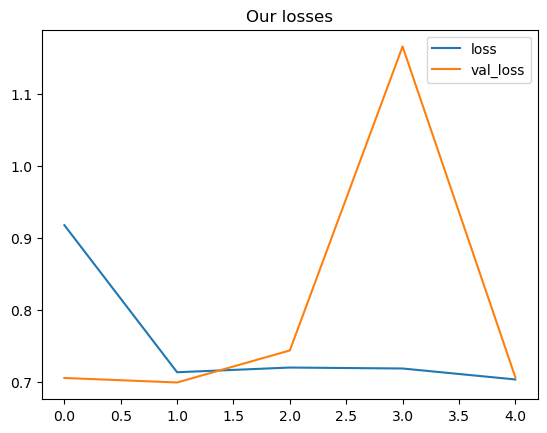

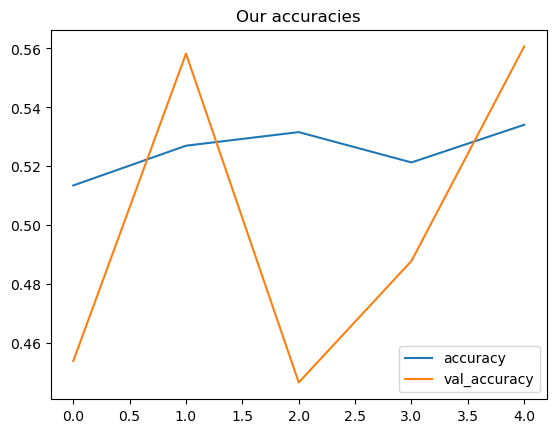

In [15]:
import matplotlib.pyplot as plt
render_history(history.history)

In [17]:
model.evaluate(test_ds)

24/24 [==============================] - 4s 117ms/step - loss: 0.7002 - accuracy: 0.5524


[0.7001708149909973, 0.5523560047149658]

In [23]:
model.export_model()

In [36]:
model.tuner.get_best_model()

In [14]:
history_list

{'model_1': {'loss': [0.9180641770362854,
   0.7137580513954163,
   0.7202917337417603,
   0.7189528942108154,
   0.7037530541419983],
  'accuracy': [0.5134943127632141,
   0.5269886255264282,
   0.5316051244735718,
   0.5213068127632141,
   0.5340909361839294],
  'val_loss': [0.7058049440383911,
   0.6995452046394348,
   0.7440506219863892,
   1.1662859916687012,
   0.7069011330604553],
  'val_accuracy': [0.45388349890708923,
   0.5582524538040161,
   0.446601927280426,
   0.48786407709121704,
   0.5606796145439148]}}